<h1>Importing the Data</h1>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train_url="https://drive.google.com/uc?export=download&id=1DdyFZ9fizNFyinCvnW3npY7S43bkzD63"
test_url="https://drive.google.com/uc?export=download&id=1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L"
train_set=pd.read_csv(train_url)
test_set=pd.read_csv(test_url)
train_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [21]:
train_set.drop('Unnamed: 0',axis=1,inplace=True)

<h1>Data Preparation</h1>

In [25]:
df=train_set.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3750 non-null   object 
 1   Location           3750 non-null   object 
 2   Year               3750 non-null   int64  
 3   Kilometers_Driven  3750 non-null   int64  
 4   Fuel_Type          3750 non-null   object 
 5   Transmission       3750 non-null   object 
 6   Owner_Type         3750 non-null   object 
 7   Mileage            3749 non-null   object 
 8   Engine             3722 non-null   object 
 9   Power              3722 non-null   object 
 10  Seats              3718 non-null   float64
 11  Price              3750 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 351.7+ KB


In [27]:
object_value_columns=["Mileage","Engine","Power"]
for i in object_value_columns:
    df[i]=df[i].str.extract(r"([0-9]*\.?[0-9]+)").astype(np.float64)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84,1199.0,84.00,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49,1493.0,100.00,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.00,1598.0,103.52,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.50,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02,1248.0,88.76,5.0,2.65


In [29]:
object_columns=["Location","Fuel_Type","Transmission","Owner_Type"]
for i in object_columns:
    print(df[i].value_counts())

Location
Mumbai        491
Hyderabad     469
Coimbatore    424
Kochi         400
Pune          367
Kolkata       333
Delhi         319
Chennai       305
Jaipur        272
Bangalore     234
Ahmedabad     136
Name: count, dtype: int64
Fuel_Type
Diesel      1998
Petrol      1751
Electric       1
Name: count, dtype: int64
Transmission
Manual       2673
Automatic    1077
Name: count, dtype: int64
Owner_Type
First             3083
Second             589
Third               73
Fourth & Above       5
Name: count, dtype: int64


<h1>Encoding the Data</h1>

In [32]:
encoded_data=pd.get_dummies(df,columns=object_columns,drop_first=True)
encoded_data.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Tata Tiago 1.2 Revotron XZ WO Alloy,2017,16500,23.84,1199.0,84.00,5.0,5.00,False,False,...,False,False,False,False,False,True,True,False,False,False
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,2014,35000,15.00,1598.0,103.52,5.0,4.50,False,False,...,False,False,True,False,False,True,True,False,False,False
3,Tata Indica V2 DLS BSII,2007,200000,17.20,1396.0,53.50,5.0,0.85,False,False,...,False,False,False,False,False,False,True,False,True,False
4,Tata Manza Club Class Quadrajet90 LX,2013,64000,21.02,1248.0,88.76,5.0,2.65,False,False,...,False,False,True,False,False,False,True,False,True,False


In [34]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       3750 non-null   object 
 1   Year                       3750 non-null   int64  
 2   Kilometers_Driven          3750 non-null   int64  
 3   Mileage                    3749 non-null   float64
 4   Engine                     3722 non-null   float64
 5   Power                      3652 non-null   float64
 6   Seats                      3718 non-null   float64
 7   Price                      3750 non-null   float64
 8   Location_Bangalore         3750 non-null   bool   
 9   Location_Chennai           3750 non-null   bool   
 10  Location_Coimbatore        3750 non-null   bool   
 11  Location_Delhi             3750 non-null   bool   
 12  Location_Hyderabad         3750 non-null   bool   
 13  Location_Jaipur            3750 non-null   bool 

<h1>Data Analysis</h1>

In [37]:
df=encoded_data.copy()
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,3750.000000,3750.000000,3749.000000,3722.000000,3652.000000,3718.000000,3750.000000
mean,2013.313333,58128.811733,18.041376,1621.910532,113.589670,5.277838,9.498632
std,3.264250,40343.978048,4.522901,601.708673,54.229032,0.806216,11.207836
min,1998.000000,1000.000000,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,34000.000000,15.260000,1198.000000,75.705000,5.000000,3.500000
50%,2014.000000,53000.000000,18.000000,1493.000000,98.590000,5.000000,5.665000
75%,2016.000000,73157.750000,20.890000,1984.750000,138.100000,5.000000,9.900000
max,2019.000000,775000.000000,28.400000,5461.000000,550.000000,10.000000,160.000000


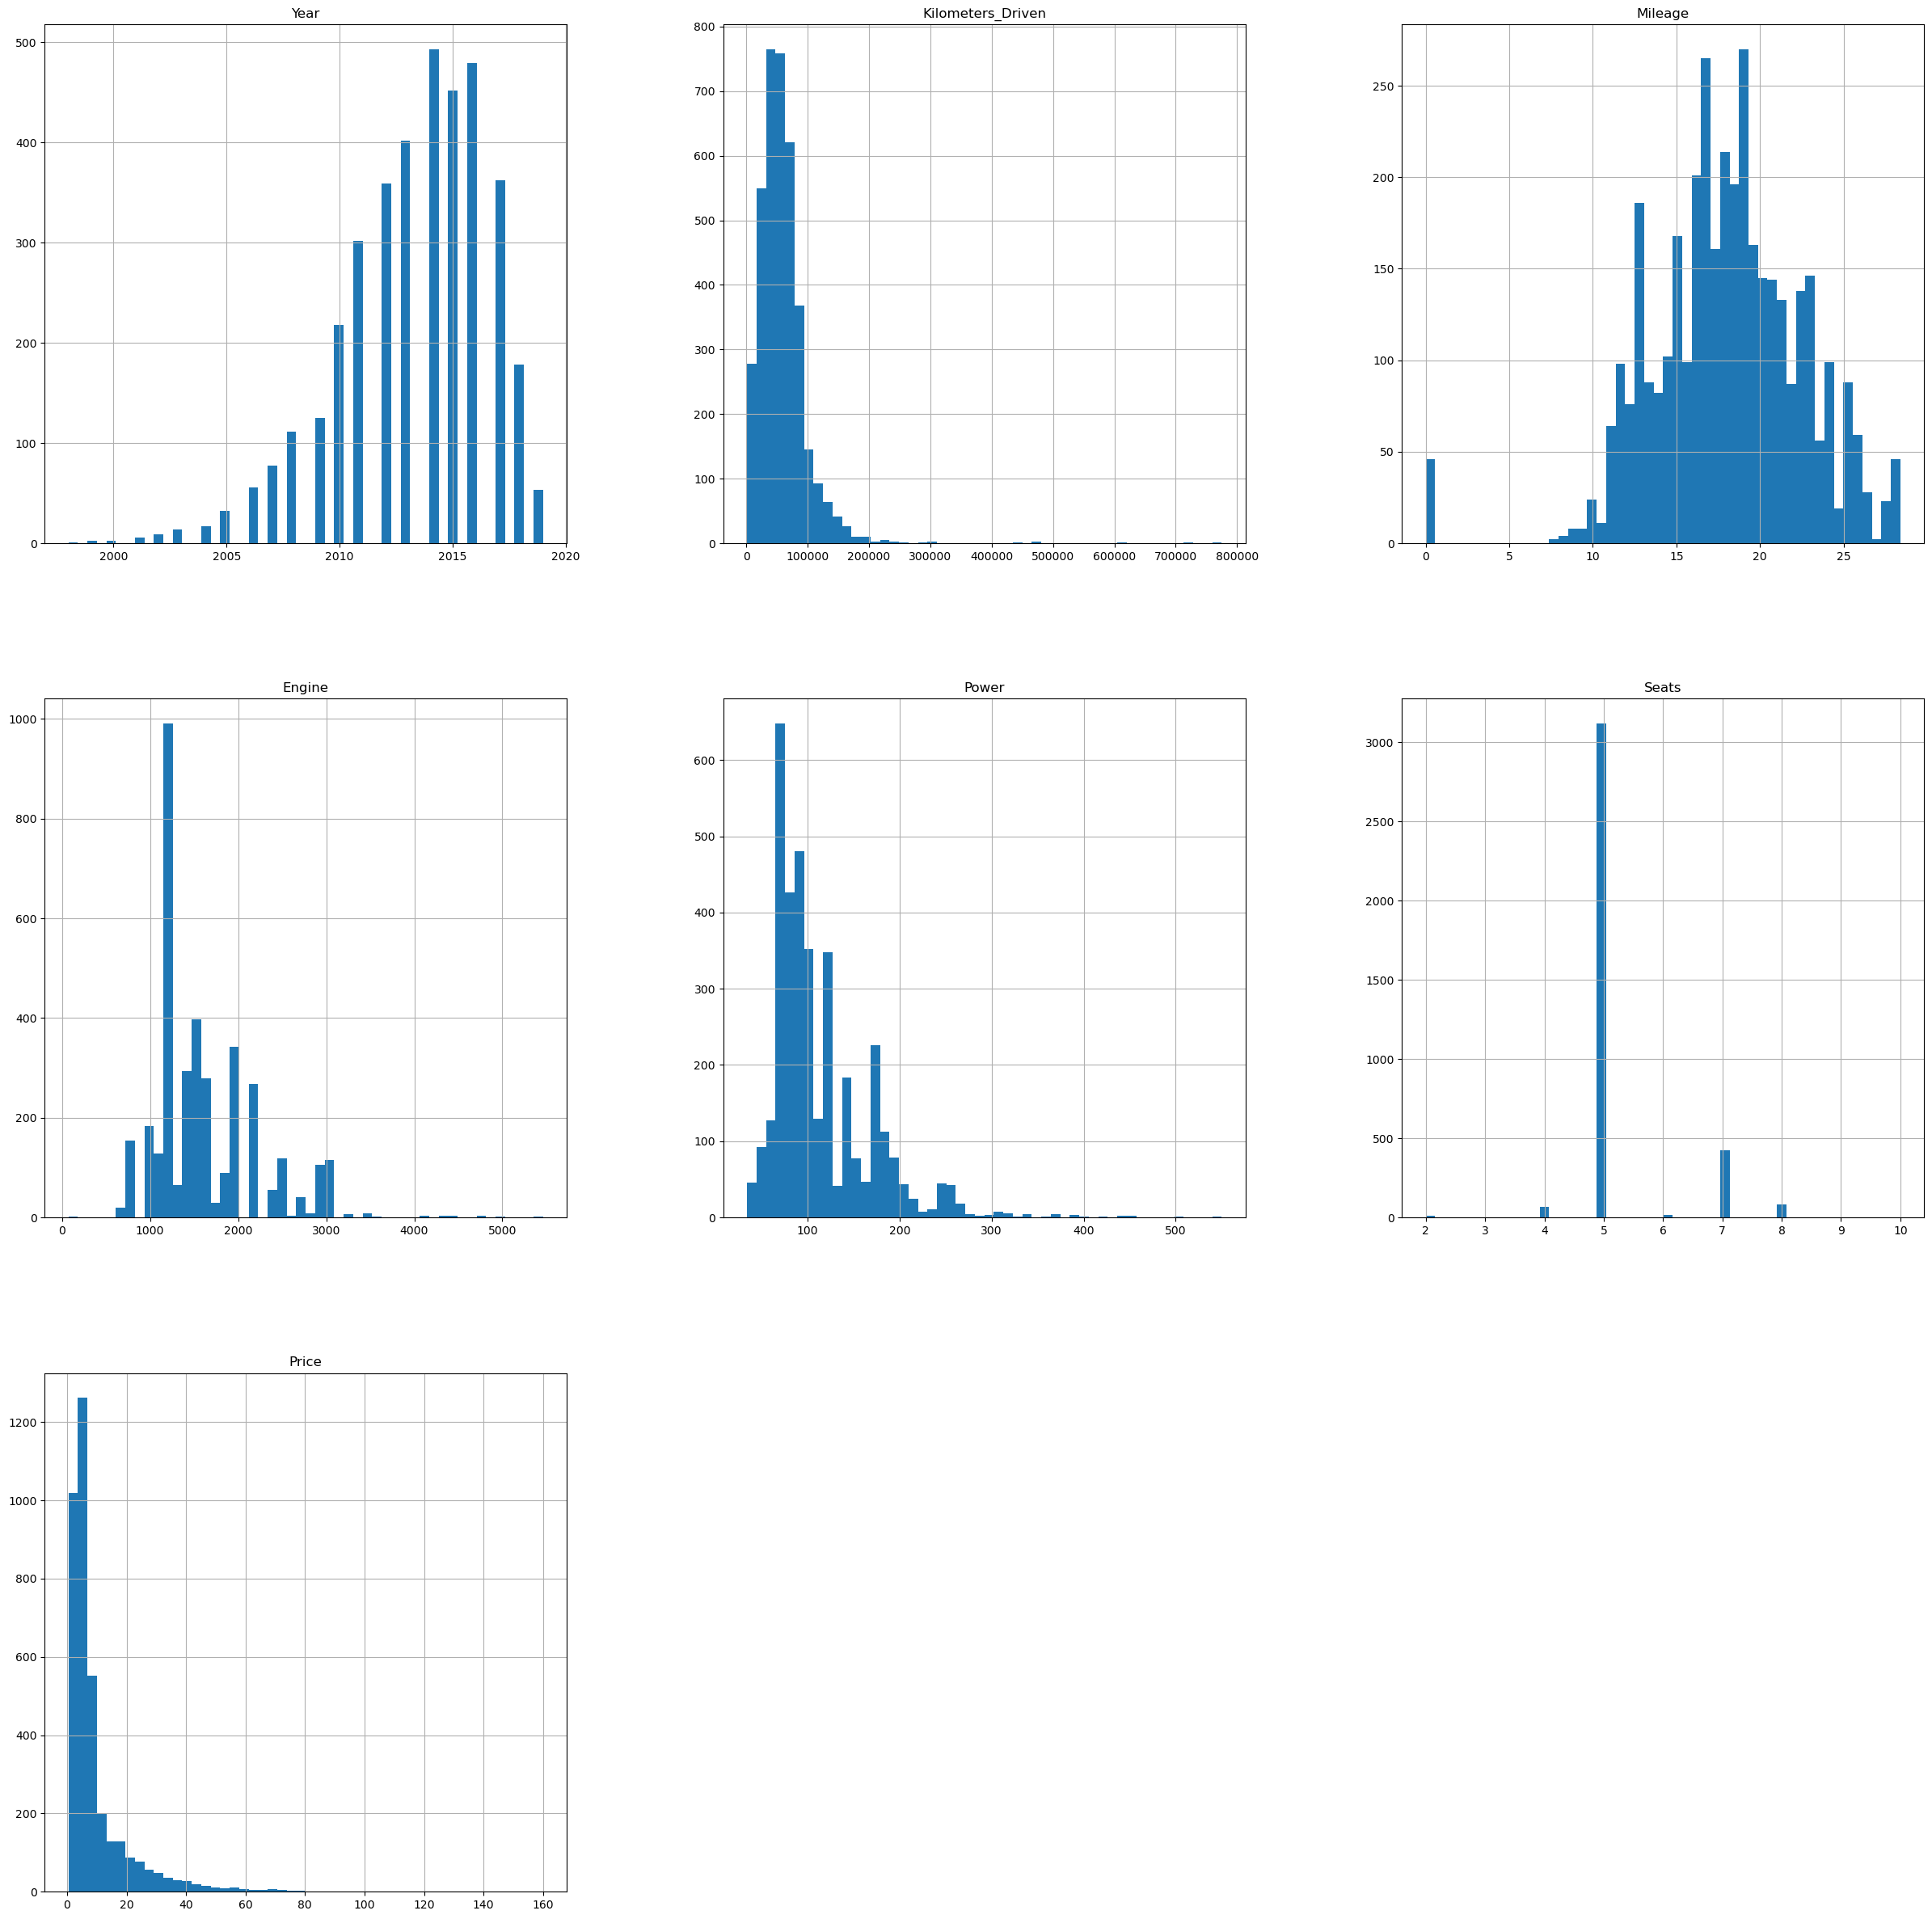

In [39]:
df.hist(bins=50,figsize=(30,30))
plt.show()

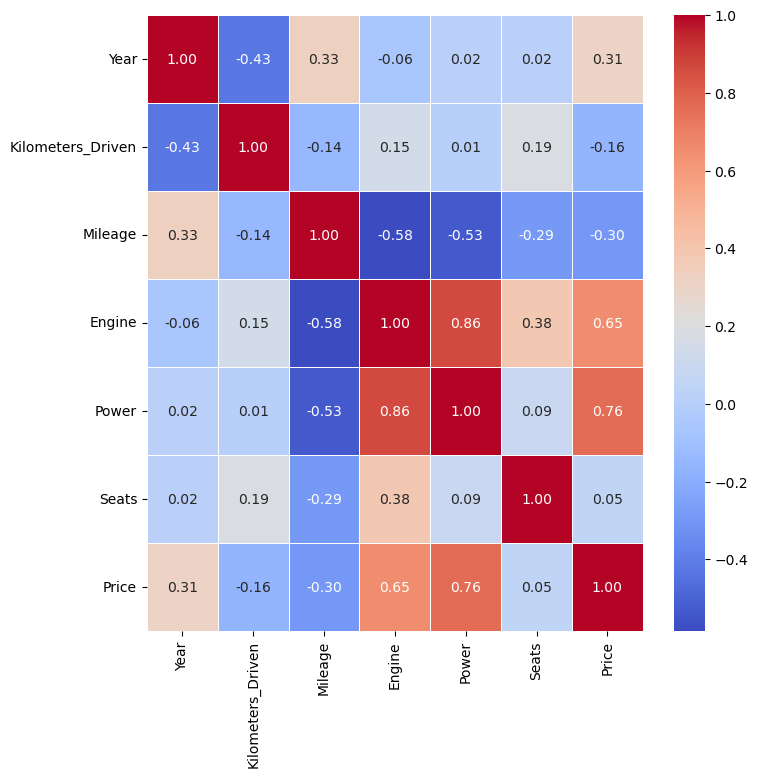

In [41]:
corr_matrix=df.iloc[:,1:8].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.5,fmt='.2f')
plt.show()

<p>We will be dropping the Location and Seats because they're effectively useless</p>

In [43]:
df.drop(['Seats','Name'],axis=1,inplace=True)#Also dropping Name to avoid overfitting

<h1>Z-Score Normalisation</h1>

In [47]:
def normalise(df):
    mean=np.mean(df,axis=0)
    std_dev=np.std(df,axis=0)
    return(df-mean)/std_dev
n_df=pd.concat([normalise(df.select_dtypes(include="number")),df.select_dtypes(exclude="number")])
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 3749
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       3750 non-null   float64
 1   Kilometers_Driven          3750 non-null   float64
 2   Mileage                    3749 non-null   float64
 3   Engine                     3722 non-null   float64
 4   Power                      3652 non-null   float64
 5   Price                      3750 non-null   float64
 6   km_per_year                3750 non-null   float64
 7   Location_Bangalore         3750 non-null   object 
 8   Location_Chennai           3750 non-null   object 
 9   Location_Coimbatore        3750 non-null   object 
 10  Location_Delhi             3750 non-null   object 
 11  Location_Hyderabad         3750 non-null   object 
 12  Location_Jaipur            3750 non-null   object 
 13  Location_Kochi             3750 non-null   object 
 1

<h1>KNNImputation</h1>